# Graduação em Matemática Aplicada e Ciência de Dados  
**Álgebra Linear Numérica**  
Bernardo Freitas Paulo da Costa  
Monitora: Beatriz Lúcia Teixeira de Souza  

## Projeto 4  
### Álgebra Linear e Matrizes Aleatórias  
**para 21 de Junho de 2025**  

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import time #ajuda a ver como os ks mudam na E)
np.random.seed(42)
%matplotlib inline

In [2]:
# Gerando matriz aleatória m x n

def matrix(m, n):
    """
    Gera uma matriz aleatória de tamanho m x n.
    """
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Questão 1. Matrizes Gaussianas  
Uma matriz gaussiana tem todas as entradas $ A_{ij} $ independentes e distribuídas segundo uma normal padrão, ou seja, $ A_{ij} \sim \mathcal{N}(0,1) $.  

**a) Distribuição das normas.**  
Faça um histograma da norma-2 das colunas de uma matriz gaussiana $ A_{m \times n} $. Use vários valores de $ m $, e comente o que você observa.  



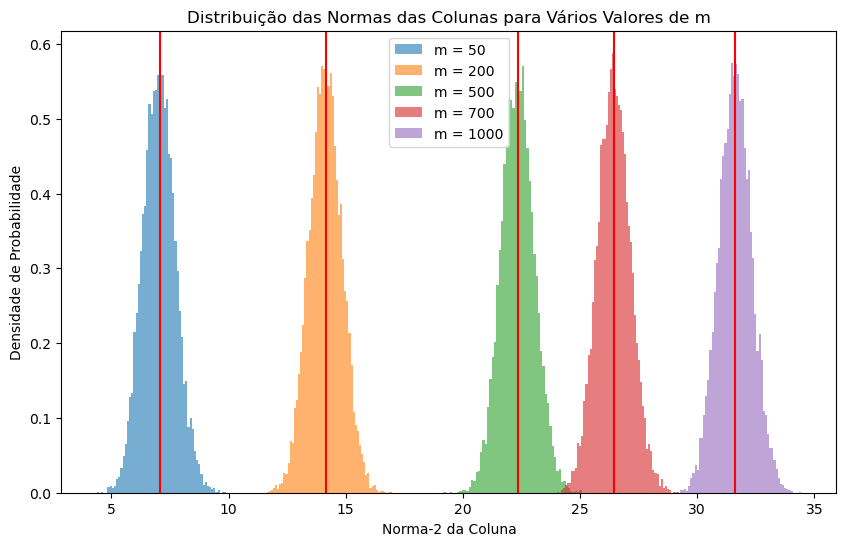

In [3]:
# Dimensões das matrizes
m_values = [ 50, 200, 500, 700, 1000]
n = 10000

# Plotando gráfico inicial
plt.figure(figsize=(10,6))

# Iterando para cada valor possível de m
for m in m_values:

   # Gerando a matriz e criando a sua lista da norma das colunas
   A = matrix(m, n)
   A_norms = []

   # Salvando a norma de cada coluna
   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))

   # Plotando o histograma das normas, e uma linha vertical da média
   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

# Detalhes a mais do plot
plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

Por uma ***grande*** coincidência, matrizes aleatórias gaussianas possuem vetores cuja norma também representa uma distribuissão aproximadamente gaussiana.

Claro, na matemática não temos coincidências, e nesse caso a explicação é bem simples!
Cada elemento $A_{ij}$ de uma matriz $A_{m \times n}$ é uma variável aleatória $A_{ij} \sim \mathcal{N}(0,1)$, logo, $\mu(A_{ij}^2) = 1$.

Ora, a norma quadrada de um vetor $A_j$ nada mais é do que $||A_j||^2_2 = \sum^i A_{ij}^2$, ou seja, $\mu (||A_j||^2_2) = \sum^i 1 = m \therefore \mu (||A_j||_2) = \sqrt m$. 

As linhas vermelhas no gráfico indicam as médias $\sqrt m$ para cada quantidade de linhas testada. 

Podemos observar as distribuições melhor no gráfico abaixo:

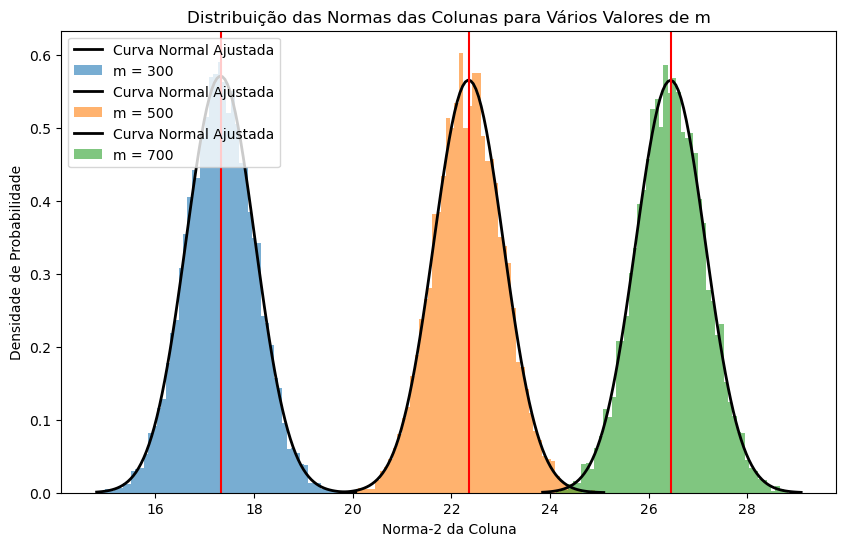

In [4]:
# Mesmo código anterior adicionando a curva normal


m_values = [300, 500, 700]
n = 10000

plt.figure(figsize=(10,6))

for m in m_values:
   A = matrix(m, n)
   A_norms = []

   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))
   
   # Aqui eu ploto uma curva normal fittada na lista de normas
   med, desv_pad = norm.fit(A_norms)
   x = np.linspace(min(A_norms), max(A_norms), 100) # Eixo de plotagem da curva
   p = norm.pdf(x, med, desv_pad)
   plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')


   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

**b) Produtos internos.**  
Fixe $m = 100$ e faça o histograma do produto interno $\langle A_i, A_j \rangle$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100$, 200, 500 e 1000. O que acontece? Qual parece ser a distribuição para $n \to \infty$?  


desvio padrão = 9.779956549765707, erro = 0.22004345023429295
media = 0.021240516817008483, erro = 0.021240516817008483


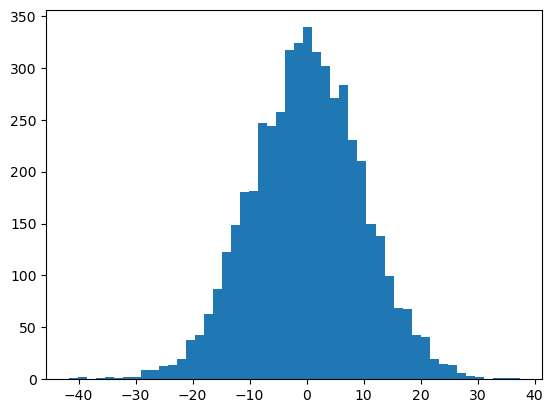

desvio padrão = 10.014999527546745, erro = 0.014999527546745384
media = 0.05643016341885421, erro = 0.05643016341885421


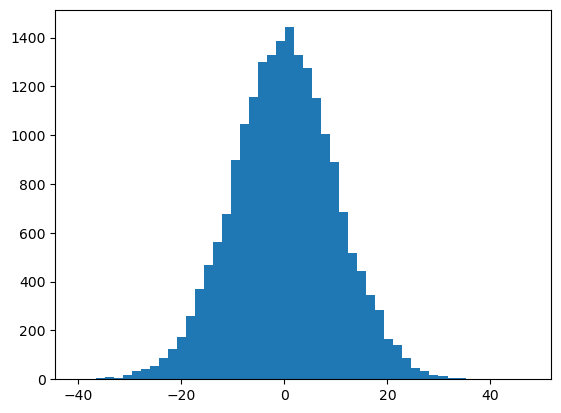

desvio padrão = 10.080276366836708, erro = 0.08027636683670814
media = -0.010968137866110426, erro = 0.010968137866110426


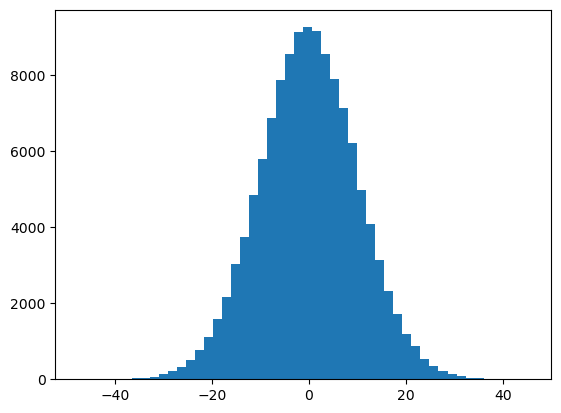

desvio padrão = 10.037114556552325, erro = 0.037114556552324984
media = 0.02216043342839852, erro = 0.02216043342839852


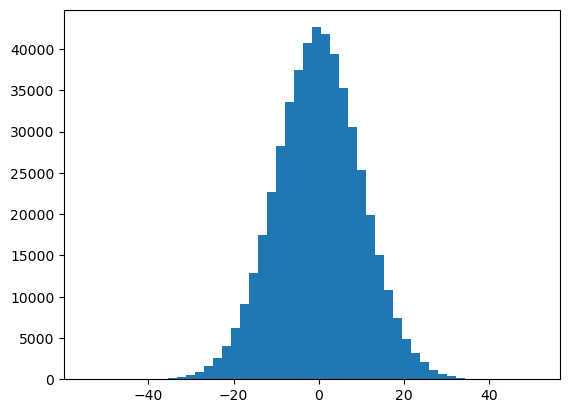

In [5]:
m = 100
ns = [100, 200, 500, 1000]

for n in ns:
    
    mx = matrix(m, n)
    #pega dos os produtos com o numpy, descarta os que não quer depois
    prod = mx.T @ mx
    indices = np.triu_indices(n, k=1)
    off_diagonal_products = prod[indices]
    
    plt.hist(off_diagonal_products, bins=50)
    #mostra a variancia e media
    print(f"desvio padrão = {np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
    print(f"media = {np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
    plt.show()           

de novo, apresenta um comportamento normal, que se evidencia mais com o crescimento de M. Além de deixar a curva ainda mais facil de se observar, a curva se estreita, e menos dados são observados nas caudas. Como discutido anteriormente, $\mu \approx 0$, $\sigma \approx \sqrt{n}$ o codigo acima indica valores ligeiramente diferentes do esperado. Se espera que com $x \to \inf$, A curva normal fica ainda mais evidente, e os parametros tendam ao téorico $\mu \to 0$, $\sigma \to 10$

In [6]:
mx = matrix(m=100, n=30000) #maior que isso deu pau na maquina
prod = mx.T @ mx
indices = np.triu_indices(n, k=1)
off_diagonal_products = prod[indices]

plt.hist(off_diagonal_products, bins=50)
np.std(off_diagonal_products)
print(f"{np.std(off_diagonal_products)}, erro = {np.abs(np.std(off_diagonal_products) - 10)}")
print(f"{np.mean(off_diagonal_products)}, erro = {np.abs(np.mean(off_diagonal_products))}")
plt.show()

MemoryError: Unable to allocate 6.71 GiB for an array with shape (30000, 30000) and data type float64

Com $m$ na escala de $10^5$, o erro comparado com o esperado $N(0,10^2)$ diminui ainda mais, se espera que com valores ainda menores o erro $\to 0$

**c) A distribuição do máximo.**  
Queremos ver quão "não ortogonal" é a matriz $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo de $\frac{|\langle A_i, A_j \rangle|}{||A_i|| \cdot ||A_j||}$ entre colunas distintas, e faça um histograma dos $K$ valores obtidos. 

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_7724\1807120667.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


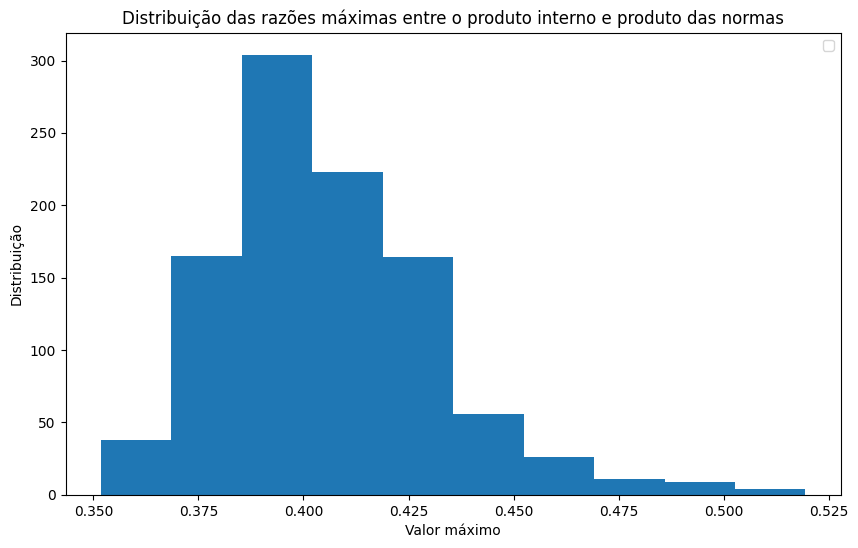

In [ ]:
max_k = []

# Função básica pra retornar o valor que queremos maximizar
def value(vec1, vec2):
   return (np.inner(vec1, vec2))/(np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Iterando para cada valor de k
for _ in range(1000):
   A = matrix(100, 300)
   max_val = 0

   # Iterando para cada par de coluna distintas desconsiderando pares repetidos
   for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
         current_val = value(A[:,i], A[:,j])
         # Obtendo o valor máximo
         if current_val > max_val:
            max_val = current_val

   # Salvando o valor máximo para cada matriz aleatória
   max_k.append(max_val)

# Plotando histograma
plt.figure(figsize=(10,6))
plt.hist(max_k)
plt.title('Distribuição das razões máximas entre o produto interno e produto das normas')
plt.xlabel("Valor máximo")
plt.ylabel("Distribuição")
plt.legend()
plt.show()


**d) Complexidade computacional.**  
Qual a complexidade de calcular o máximo acima? Qual valor de $K$ seria bom para ter uma boa estimativa do máximo esperado?  

### Exercício ***1.d)***

Vamos observar a complexidade desse algoritmo, iniciando pela função `value`:

* Primeiro calculamos o produto interno dos dois vetores, isso corresponde a $m$ produtos e $m-1$ somas, logo, uma complexidade $O(m)$
* Depois calculamos o produto das normas dos vetores, isto é, $2 \cdot (2m - 1)$ operações, logo, $O(m)$.

Portanto a função `value` tem complexidade $O(m)$.

O nosso loop 

```py
for i in range(A.shape[1]):
      for j in range(i+1, A.shape[1]):
```

está otimizado para reduzir a quantidade de operações, já que o valor de $j$ passa a ser contado a partir de $i+1$. A quantidade de operações para cada coluna $i$ será de $n - i$, o que é a soma de P.A:

$$
\sum_{i=0} ^n (n - i) = \frac{n^2 - n}{2}
$$

O que nos dá uma complexidade de $O(n^2)$.

Ora, se para cada uma dessas iterações executamos `value` uma vez, temos uma complexidade agregada de $O(n^2m)$.

Para a escolha do $K$ ideal, o valor de 1000 parece suficiente para essa matriz. Um valor muito menor sacrificaria a precisão nas avaliações, e um valor maior teria um custo computacional desproporcional. Mais detalhes sobre a escolhade $K$ para uma matriz $m \times n$ são avaliados no item **e)**

---

**e) A distribuição do máximo, parte 2.**  
Escolha valores de $K$ correspondentes e faça histogramas (comente os resultados) para os pares:  
- $(m,n) = (100, 100)$, $(100, 300)$  
- $(200, 200)$, $(200, 600)$  
- $(500, 500)$, $(500, 1500)$  
- $(1000, 1000)$, $(1000, 3000)$  

**Escolhendo Ks:**

Para escolher um bom valor de $K$, temos dois problemas diferentes:
- O custo computacional de fazer as $K$ comparações, relevante quando os outros custos, $m{,} n,$ são altos

- A confiabilidade de fazer apenas $K$ comparações, que pode enviesar os resultados se o $K$ for muito pequeno.

Não temos as ferramentas necessarias para calcular corretamente um valor estatistico para $K$, mas quando se tem um martelo, todos os problemas são como pregos, ou algo do tipo.

Podemos então, tratar esse problema como um de aprendizado de maquina, e a escolha de $K$ como um ajuste de hiperparametros:
testamos iterativamente para varios valores de K, e tomamos a média dos resultados, se a diferença entre $K_n - K_{n+1} \le \tau$ é suficientemente pequena, se diz que o valor dos maximos está convergindo pra algum lugar. Note que, se tratando de variaveis aleatorias, esse método pode ser falho, mas escolhendo $\tau$ suficientemente pequeno, bem como escolher um valor minimo de não muito pequeno, a chance disso acontecer por pura "sorte",  $\to 0$. Iterativamente, também percebemos que com $n$ aumentando, a convergencia já é rapida mesmo com Ks pequenos, enquanto para matrizes maioers, podemos usar um K grande se preocupar tanto com a parte do custo computacional.
Abaixo, iteramos para as matrizes maiores, mas ignoramos o problema para as menores, apenas usando de um K grande e confiando no tempo operacional da maquina:

In [ ]:
# Definimos a precisão que queremos alcançar
THRESHOLD = 0.0005
# Elimita erro de ruído
CHECK_INTERVAL = 2
# Valor máximo de iterações para evitar um loop infinito
MAX_ITERATIONS = 20000
#Teste com a maior matriz
m, n = 1000, 3000


def get_max(A):
    """
    Finds the maximum absolute normalized inner product between distinct columns of matrix A.
    This corresponds to one sample for our experiment.
    """

    def value(vec1, vec2):
        return (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    max_val = 0
    num_cols = A.shape[1]
    # Mesmo esquema de antes
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            current_val = value(A[:, i], A[:, j])
            if current_val > max_val:
                max_val = current_val
    return max_val

# --- Loop de simulação principal com teste de convergência ---
max_k = []
previous_mean = float('inf')
start_time = time.time()

print(f"Running simulation for m={m}, n={n}")
print(f"Stopping when change in mean < {THRESHOLD} (checked every {CHECK_INTERVAL} runs)\n")

# Iterando de 1 a MAX_ITERATIONS com intervalo de CHECK_INTERVAL
for k in range(1, MAX_ITERATIONS + 1, CHECK_INTERVAL):
    A = matrix(m, n)
    max_val = get_max(A)
    max_k.append(max_val)

    if k % CHECK_INTERVAL == 0:
        current_mean = np.mean(max_k)
        # Mudança de médias entre esse check e o check passado
        change = abs(current_mean - previous_mean)

        # Output de terminal
        print(f"K = {k:<5} | Current Mean = {current_mean:.6f} | Change = {change:.6f}")

        # Se a mudança de média for menor que o limiar de precisão, encerramos o loop
        if change < THRESHOLD:
            print(f"\nConvergence reached at K = {k}.")
            break
        
        previous_mean = current_mean

# --- Resultados finais ---

end_time = time.time()
final_mean = np.mean(max_k)
final_std = np.std(max_k)
total_time = end_time - start_time

print(f"----------------------------------------------------")
print(f"Final K value: {len(max_k)}")
print(f"Estimated Expected Maximum: {final_mean:.6f}")
print(f"Standard Deviation of Maximums: {final_std:.6f}")
print(f"Total computation time: {total_time:.2f} seconds")
print(f"----------------------------------------------------")


# --- Plotando gráficos ---
plt.figure(figsize=(10, 6))
plt.hist(max_k, bins=30, density=True, edgecolor='black', label='Histogram of Maximums')
# Linha vertical representando a média final que descobrimos
plt.axvline(final_mean, color='r', linestyle='--', linewidth=2, label=f'Estimated Mean: {final_mean:.4f}')
plt.title(f'Distribution of Maximums for K={len(max_k)} Samples (m={m}, n={n})')
plt.xlabel("Maximum Normalized Inner Product")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

Running simulation for m=1000, n=3000
Stopping when change in mean < 0.0005 (checked every 1 runs)

K = 1     | Current Mean = 1161.061610 | Change = inf
K = 2     | Current Mean = 1164.792996 | Change = 3.731386
K = 3     | Current Mean = 1160.536811 | Change = 4.256185
K = 4     | Current Mean = 1159.343811 | Change = 1.193000
K = 5     | Current Mean = 1157.198781 | Change = 2.145030
K = 6     | Current Mean = 1153.682118 | Change = 3.516663
K = 7     | Current Mean = 1157.933754 | Change = 4.251636
K = 8     | Current Mean = 1159.087506 | Change = 1.153752
K = 9     | Current Mean = 1159.056373 | Change = 0.031133
K = 10    | Current Mean = 1160.215508 | Change = 1.159135
K = 11    | Current Mean = 1160.579711 | Change = 0.364203
K = 12    | Current Mean = 1161.410279 | Change = 0.830568
K = 13    | Current Mean = 1160.419792 | Change = 0.990487
K = 14    | Current Mean = 1160.143288 | Change = 0.276504
K = 15    | Current Mean = 1160.296896 | Change = 0.153608
K = 16    | Current 

Se fingirmos que $10^{-3}$ é um threshold decente, funciona, otherwise, chutar pra 50 parece ok, mas isso é mais um chute que qualquer coisa também.

Vamos testar agora para as matrizes que nos foram solicitadas:



--- Running simulations for larger matrices with convergence check ---

Running for (m, n) = (500, 500) until convergence...
  K=10    | Mean=0.20374 | Change=inf
  K=20    | Mean=0.20480 | Change=0.00107
  K=30    | Mean=0.20558 | Change=0.00077
  K=40    | Mean=0.20345 | Change=0.00213
  K=50    | Mean=0.20369 | Change=0.00023
  K=60    | Mean=0.20355 | Change=0.00014
  K=70    | Mean=0.20373 | Change=0.00018
  K=80    | Mean=0.20401 | Change=0.00028
  K=90    | Mean=0.20419 | Change=0.00017
  K=100   | Mean=0.20457 | Change=0.00038
  K=110   | Mean=0.20374 | Change=0.00083
  K=120   | Mean=0.20337 | Change=0.00037
  K=130   | Mean=0.20300 | Change=0.00036
  K=140   | Mean=0.20267 | Change=0.00033
  K=150   | Mean=0.20248 | Change=0.00018
  K=160   | Mean=0.20255 | Change=0.00006
  Convergence reached at K=160.
Completed in 53.45 seconds.


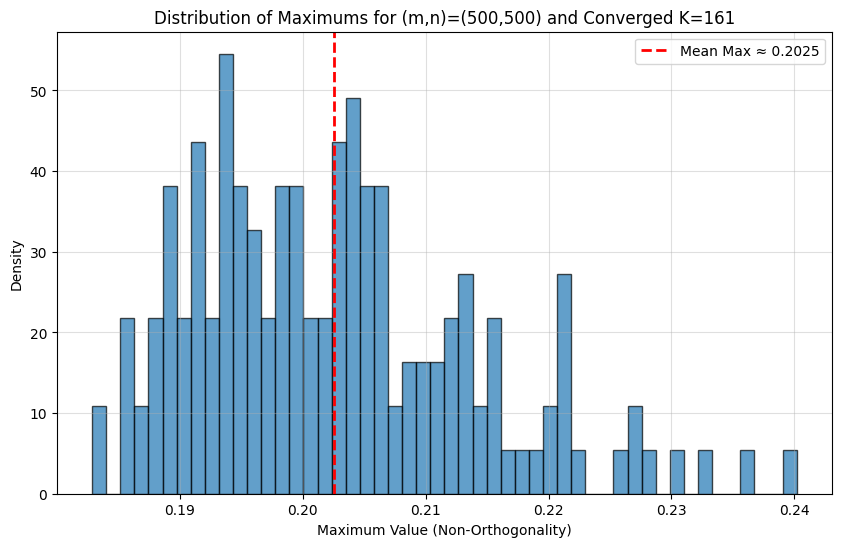


Running for (m, n) = (500, 1500) until convergence...
  K=10    | Mean=0.22693 | Change=inf
  K=20    | Mean=0.22497 | Change=0.00196
  K=30    | Mean=0.22327 | Change=0.00170
  K=40    | Mean=0.22328 | Change=0.00000
  Convergence reached at K=40.
Completed in 126.95 seconds.


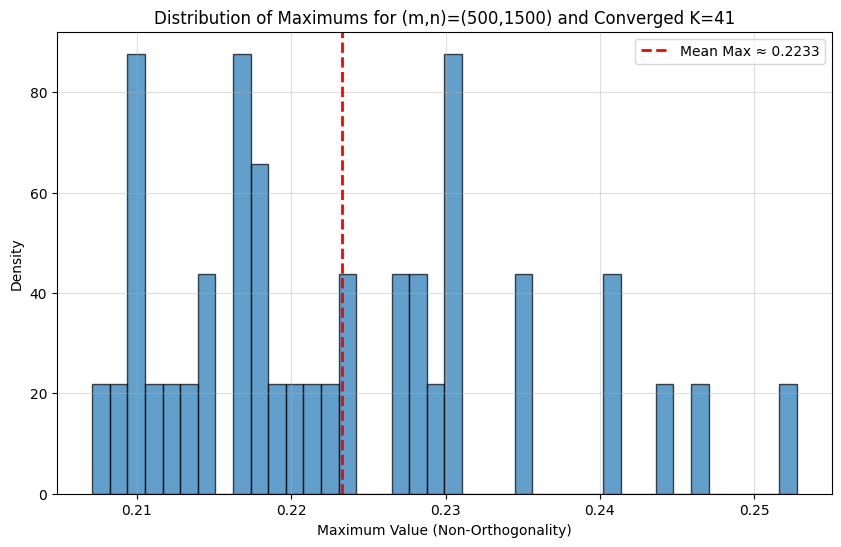


Running for (m, n) = (1000, 1000) until convergence...
  K=10    | Mean=0.15381 | Change=inf
  K=20    | Mean=0.15326 | Change=0.00055
  K=30    | Mean=0.15338 | Change=0.00012
  K=40    | Mean=0.15378 | Change=0.00041
  K=50    | Mean=0.15367 | Change=0.00012
  K=60    | Mean=0.15370 | Change=0.00004
  Convergence reached at K=60.
Completed in 212.47 seconds.


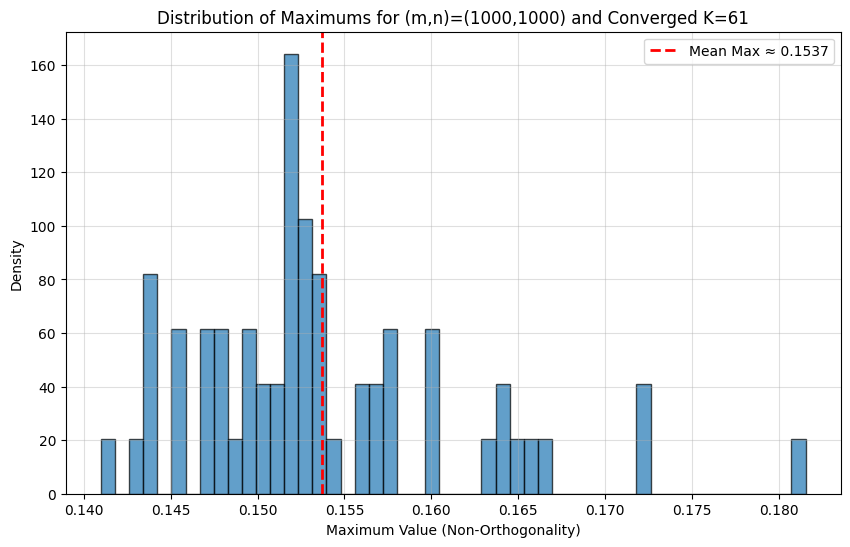


Running for (m, n) = (1000, 3000) until convergence...
  K=10    | Mean=0.16769 | Change=inf
  K=20    | Mean=0.16507 | Change=0.00262
  K=30    | Mean=0.16501 | Change=0.00005
  Convergence reached at K=30.
Completed in 1251.33 seconds.


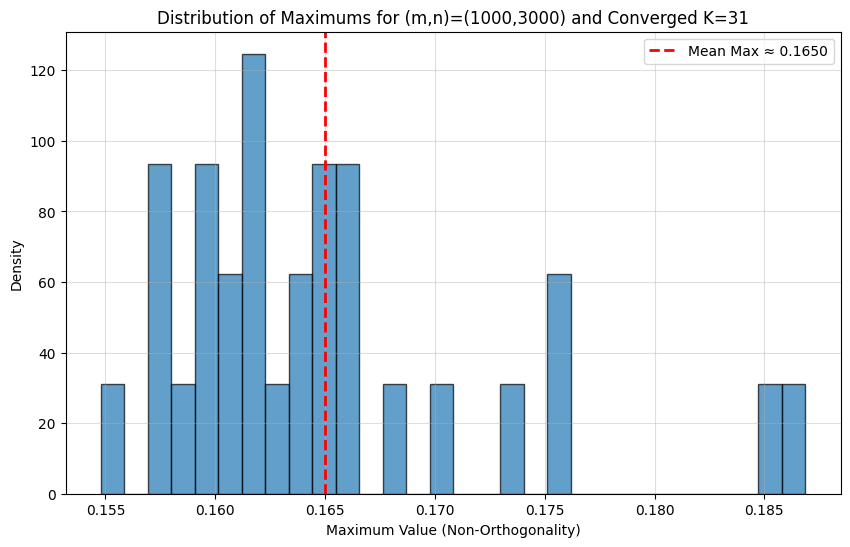

In [ ]:
# Função auxiliar para descobrir o valor máximo de uma matriz
def find_max_for_one_matrix(m, n):
    """Generates one m x n matrix and finds the max absolute normalized inner product."""
    A = matrix(m, n) 
    max_val = 0

    # Normas calculadas previamente para acelerar os cálculos
    norms = np.linalg.norm(A, axis=0)

    num_cols = A.shape[1]
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            norm_prod = norms[i] * norms[j]
            # É muito improvável que uma coluna seja toda de zeros, mas ainda assim vamos evitar um erro aqui
            if norm_prod == 0:
                continue
            
            # Como requerido, vamos utilizar os módulos das normas e prod. interno
            inner_prod = np.dot(A[:, i], A[:, j])
            current_val = abs(inner_prod / norm_prod)

            if current_val > max_val:
                max_val = current_val

    return max_val

# --- Matrizes definidas ---
smaller_mat = [(100, 100), (100, 300), (200, 200), (200, 600)]
larger_mat  = [(500, 500), (500, 1500), (1000, 1000), (1000, 3000)]

# ==============================================================================
# Parte 1: Run with a fixed K for the smaller matrices
# ==============================================================================
print("--- Simulação para matrizes pequenas ---")
k_fixed = 1000
for m, n in smaller_mat:
    start_time = time.time()
    print(f"\nRodando para (m, n) = ({m}, {n}) com K fixado K={k_fixed}...")
  
    max_k_values = [find_max_for_one_matrix(m, n) for _ in range(k_fixed)]
  
    end_time = time.time()
    print(f"Concluído em {end_time - start_time:.2f} segundos.")
    # Plotting the histogram for this pair
    plt.figure(figsize=(10, 6))
    plt.hist(max_k_values, bins=50, density=True, edgecolor='black', alpha=0.7)
    mean_max = np.mean(max_k_values)
    plt.axvline(mean_max, color='r', linestyle='--', lw=2, label=f'Mean Max ≈ {mean_max:.4f}')
    plt.title(f'Distribuição dos máximos para (m,n)=({m},{n}) e K={k_fixed}')
    plt.xlabel("Valor máximo (Não-Ortogonalidade)")
    plt.ylabel("Densidade")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

# ==============================================================================
# Parte 2: Checando para matrizes grandes
# ==============================================================================
print("\n\n--- Simulação para matrizes grandes ---")
THRESHOLD = 0.0001
CHECK_INTERVAL = 10
MAX_ITERATIONS = 5000  # Evitar loop infinito
min_k = 10

for m, n in larger_mat:
    start_time = time.time()
    print(f"\nRodando para (m, n) = ({m}, {n}) até a convergência...")
    
    max_k_values = []
    previous_mean = float('inf')
#Inicia com K=10
    for k in range(min_k, MAX_ITERATIONS + 1):
        max_val = find_max_for_one_matrix(m, n)
        max_k_values.append(max_val)

        # Checar convergência...
        if k % CHECK_INTERVAL == 0 and k > 0:
            current_mean = np.mean(max_k_values)
            change = abs(current_mean - previous_mean)
            print(f"  K={k:<5} | Mean={current_mean:.5f} | Change={change:.5f}")

            # Checar convergência a partir de 2 intervalos
            if change < THRESHOLD and k > CHECK_INTERVAL:
                print(f"  Convergence reached at K={k}.")
                break
            previous_mean = current_mean
    
    end_time = time.time()
    print(f"Completed in {end_time - start_time:.2f} seconds.")

    # Enfim, plotando.
    plt.figure(figsize=(10, 6))
    plt.hist(max_k_values, bins= min(50, len(max_k_values)), density=True, edgecolor='black', alpha=0.7)
    final_mean = np.mean(max_k_values)
    plt.axvline(final_mean, color='r', linestyle='--', lw=2, label=f'Mean Max ≈ {final_mean:.4f}')
    plt.title(f'Distribution of Maximums for (m,n)=({m},{n}) and Converged K={min_k + len(max_k_values) - 1}')
    plt.xlabel("Maximum Value (Non-Orthogonality)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()